# Task-2 Quantitative analysis

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import talib as tl
import plotly.express as pe


In [37]:
import sys
sys.path.append('..')

In [39]:
def load_csv(file_path):
    """
    Load a CSV file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading CSV file: {e}")

In [43]:

def load_historical_data(sticker):
    stock_data =pd.read_csv(f'F:/Week1_Challenge/Data/{sticker}_historical_data.csv')
    #stock_data.head(10) # Adjust the path as necessary
    return stock_data

In [52]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [54]:
def numberOfArticlesWithSentimentAnalysis(news_data):
    sentiment_counts = news_data['sentiment_score_word'].value_counts().sort_index()

    # Define colors for each category
    colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

    # Create the bar plot with specified colors
    sentiment_counts.plot(kind="bar", figsize=(10, 4), title='Sentiment Analysis',
                        xlabel='Sentiment categories', ylabel='Number of Published Articles',
                        color=[colors[category] for category in sentiment_counts.index])

    plt.show()


In [55]:
def getSentimentAnalysisOfPublisher(news_data, target_publisher):
    colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
    # Filter data for the target publisher
    publisher_data = news_data[news_data['publisher'] == target_publisher]
    sentiment_counts = publisher_data['sentiment_score_word'].value_counts().sort_index()

    sentiment_counts.plot(kind="bar", figsize=(10, 4), title=f'Sentiment Analysis of {target_publisher}',
                      xlabel='Sentiment categories', ylabel='Number of Published Articles',
                      color=[colors[category] for category in sentiment_counts.index])


In [56]:
def checkMissingValueOfHistoricalDataset(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,stock_data_tsla):
    combined_df = pd.concat([stock_data_aapl.isnull().sum(),
                            stock_data_goog.isnull().sum(),
                            stock_data_amzn.isnull().sum(),
                            stock_data_msft.isnull().sum(),
                            stock_data_meta.isnull().sum(),
                            stock_data_nvda.isnull().sum(),
                            stock_data_tsla.isnull().sum()],
                            axis=0)
    combined_df.head()

In [57]:
def calculateDescriptiveStatisticsOfHistoricalData(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,stock_data_tsla):
    aapl_stats = stock_data_aapl['Close'].describe().to_frame('AAPL')
    goog_stats = stock_data_goog['Close'].describe().to_frame('GOOG')
    amzn_stats = stock_data_amzn['Close'].describe().to_frame('AMZN')
    msft_stats = stock_data_msft['Close'].describe().to_frame('MSFT')
    meta_stats = stock_data_meta['Close'].describe().to_frame('META')
    nvda_stats = stock_data_nvda['Close'].describe().to_frame('NVDA')
    tsla_stats = stock_data_tsla['Close'].describe().to_frame('TSLA')
    combined_stats = pd.concat([aapl_stats, goog_stats,amzn_stats,msft_stats,meta_stats,nvda_stats,tsla_stats], axis=1)
    return combined_stats


In [58]:
def analysisClosingPriceWithDate(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda):
    # Create subplots for side-by-side display
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # Adjust figsize as needed

    axs[0,0].plot(stock_data_aapl['Date'], stock_data_aapl['Close'], label='Close',color='green')
    axs[0,0].set_title('AAPL')
    axs[0,0].legend()

    axs[0,1].plot(stock_data_amzn['Date'], stock_data_amzn['Close'], label='AMZN')
    axs[0,1].set_title('AMZN')
    axs[0,1].legend()


    axs[0,2].plot(stock_data_goog['Date'], stock_data_goog['Close'], label='Close',color='yellow')
    axs[0,2].set_title('GOOG')
    axs[0,2].legend()


    axs[1,0].plot(stock_data_nvda['Date'], stock_data_nvda['Close'], label='Close',color='brown')
    axs[1,0].set_title('NVDA')
    axs[1,0].legend()
    axs[1,0].set_xlabel('Date')


    axs[1,1].plot(stock_data_msft['Date'], stock_data_msft['Close'], label='Close',color='purple')
    axs[1,1].set_title('MSFT')
    axs[1,1].legend()
    axs[1,1].set_xlabel('Date')

    axs[1,2].plot(stock_data_meta['Date'], stock_data_meta['Close'], label='Close',color='orange')
    axs[1,2].set_title('META')
    axs[1,2].legend()
    axs[1,2].set_xlabel('Date')

    plt.show()


In [59]:
def calculateTechnicalIndicator(stock_data):
    stock_data['SMA'] = tl.SMA(stock_data['Close'], timeperiod=20)
    stock_data['RSI'] = tl.RSI(stock_data['Close'], timeperiod=14)
    stock_data['EMA'] = tl.EMA(stock_data['Close'], timeperiod=20)

    macd_signal, macd, _ = tl.MACD(stock_data['Close'])
    stock_data['MACD'] =macd
    stock_data['MACD_Signal']=macd_signal

In [ ]:
def technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,ticker):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # Adjust figsize as needed

    axs[0,0].plot(stock_data_aapl['Date'], stock_data_aapl['Close'], label='Closing price',color='green')
    axs[0,0].plot(stock_data_aapl['Date'], stock_data_aapl[ticker], label=ticker,color='red')
    axs[0,0].set_title('AAPL')
    axs[0,0].legend()

    axs[0,1].plot(stock_data_amzn['Date'], stock_data_amzn['Close'], label='Closing price')
    axs[0,1].plot(stock_data_amzn['Date'], stock_data_amzn[ticker], label=ticker,color='red')
    axs[0,1].set_title('AMZN')
    axs[0,1].legend()


    axs[0,2].plot(stock_data_goog['Date'], stock_data_goog['Close'], label='Closing price',color='yellow')
    axs[0,2].plot(stock_data_goog['Date'], stock_data_goog[ticker], label=ticker,color='red')
    axs[0,2].set_title('GOOG')
    axs[0,2].legend()


    axs[1,0].plot(stock_data_nvda['Date'], stock_data_nvda['Close'], label='Closing price',color='blue')
    axs[1,0].plot(stock_data_nvda['Date'], stock_data_nvda[ticker], label=ticker,color='red')
    axs[1,0].set_title('NVDA')
    axs[1,0].legend()
    axs[1,0].set_xlabel('Date')


    axs[1,1].plot(stock_data_msft['Date'], stock_data_msft['Close'], label='Closing price',color='purple')
    axs[1,1].plot(stock_data_msft['Date'], stock_data_msft[ticker], label=ticker,color='red')
    axs[1,1].set_title('MSFT')
    axs[1,1].legend()
    axs[1,1].set_xlabel('Date')

    axs[1,2].plot(stock_data_meta['Date'], stock_data_meta['Close'], label='Closing price',color='pink')
    axs[1,2].plot(stock_data_meta['Date'], stock_data_meta[ticker], label=ticker,color='red')
    axs[1,2].set_title('META')
    axs[1,2].legend()
    axs[1,2].set_xlabel('Date')

    plt.show()



In [ ]:
def closingPriceRelativeStrengthIndex(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda):
    fig, axs = plt.subplots(6,2, gridspec_kw={"height_ratios": [1, 1, 1, 1,1,1]}, figsize=(16,22))

    # For AAPL
    axs[0][0].plot(stock_data_aapl['Date'], stock_data_aapl['Close'],label="Close")
    axs[0][0].set_title("AAPL Stock Price")
    axs[0][0].legend()
    axs[1][0].axhline(y=70, color='r',linestyle="--")
    axs[1][0].axhline(y=30, color='g',linestyle="--")
    axs[1][0].plot(stock_data_aapl['Date'],stock_data_aapl['RSI'], color='orange', label="RSI")
    axs[1][0].legend()

    # for GOOG
    axs[0][1].plot(stock_data_goog['Date'], stock_data_goog['Close'],label="Close")
    axs[0][1].set_title("GOOG Stock Price")
    axs[0][1].legend()
    axs[1][1].axhline(y=70, color='r',linestyle="--")
    axs[1][1].axhline(y=30, color='g',linestyle="--")
    axs[1][1].plot(stock_data_goog['Date'],stock_data_goog['RSI'], color='orange', label="RSI")
    axs[1][1].legend()

    # for AMZN
    axs[2][0].plot(stock_data_amzn['Date'], stock_data_amzn['Close'],label="Close")
    axs[2][0].set_title("AMZN Stock Price")
    axs[2][0].legend()
    axs[3][0].axhline(y=70, color='r',linestyle="--")
    axs[3][0].axhline(y=30, color='g',linestyle="--")
    axs[3][0].plot(stock_data_amzn['Date'],stock_data_amzn['RSI'], color='orange', label="RSI")
    axs[3][0].legend()

    # for NVDA
    axs[2][1].plot(stock_data_nvda['Date'], stock_data_nvda['Close'],label="Close")
    axs[2][1].set_title("NVDA Stock Price")
    axs[2][1].legend()
    axs[3][1].axhline(y=70, color='r',linestyle="--")
    axs[3][1].axhline(y=30, color='g',linestyle="--")
    axs[3][1].plot(stock_data_nvda['Date'],stock_data_nvda['RSI'], color='orange', label="RSI")
    axs[3][1].legend()


    # for MSFT
    axs[4][0].plot(stock_data_msft['Date'], stock_data_msft['Close'],label="Close")
    axs[4][0].set_title("MSFT Stock Price")
    axs[4][0].legend()
    axs[5][0].axhline(y=70, color='r',linestyle="--")
    axs[5][0].axhline(y=30, color='g',linestyle="--")
    axs[5][0].plot(stock_data_msft['Date'],stock_data_msft['RSI'], color='orange', label="RSI")
    axs[5][0].legend()

    # for META
    axs[4][1].plot(stock_data_meta['Date'], stock_data_meta['Close'],label="Close")
    axs[4][1].set_title("META Stock Price")
    axs[4][1].legend()
    axs[5][1].axhline(y=70, color='r',linestyle="--")
    axs[5][1].axhline(y=30, color='g',linestyle="--")
    axs[5][1].plot(stock_data_meta['Date'],stock_data_meta['RSI'], color='orange', label="RSI")
    axs[5][1].legend()
    fig.show()
    # momentum oscillator that measures the speed and change of price movements.
    # Identifying overbought and oversold conditions. A reading above 70 is typically
    # considered overbought, while a reading below 30 is considered oversol

In [91]:
def calculatePortfolioWeightAndPerformance():
    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns

    tickers =['AAPL','AMZN','GOOG','MSFT','NVDA','META','TSLA']
    # Load data from each ticker file
    dataframes = [load_historical_data(ticker) for ticker in tickers]

    # Combine dataframes into a single DataFrame
    combined_data = pd.concat(dataframes, axis=1)['Close']

    new_column_names = ['AAPL', 'AMZN','GOOG', 'META','MSFT','NVDA','TSLA']
    combined_data.columns = new_column_names

    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(combined_data)
    S = risk_models.sample_cov(combined_data)

    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    weights = dict(zip(['AAPL', 'AMZN','GOOG', 'META','MSFT','NVDA','TSLA'],[round(value, 2) for value in weights.values()]))

    # Print Portfolio weights
    print("Portfolio Weights:")
    print(weights)


    # Calculate and print portfolio performance
    print("\nPortfolio Performance:")
    ef.portfolio_performance(verbose=True)


In [ ]:
def closingPriceMovingAverageConvergenceDivergence(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda):

    fig, axs = plt.subplots(6,2, gridspec_kw={"height_ratios": [1, 1, 1, 1,1,1]}, figsize=(16,22))

    # for AAPL
    axs[0][0].plot(stock_data_aapl['Date'], stock_data_aapl['Close'],label="Close")
    axs[0][0].set_title("AAPL Stock Price")
    axs[0][0].legend()
    axs[1][0].axhline(y=5, color='r',linestyle="--")
    axs[1][0].axhline(y=-5, color='g',linestyle="--")
    axs[1][0].plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
    axs[1][0].plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
    axs[1][0].legend()


    # for GOOG
    axs[0][1].plot(stock_data_goog['Date'], stock_data_goog['Close'],label="Close")
    axs[0][1].set_title("GOOG Stock Price")
    axs[0][1].legend()
    axs[1][1].axhline(y=5, color='r',linestyle="--")
    axs[1][1].axhline(y=-5, color='g',linestyle="--")
    axs[1][1].plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
    axs[1][1].plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
    axs[1][1].legend()

    # for AMZN
    axs[2][0].plot(stock_data_amzn['Date'], stock_data_amzn['Close'],label="Close")
    axs[2][0].set_title("AMZN Stock Price")
    axs[2][0].legend()
    axs[3][0].axhline(y=5, color='r',linestyle="--")
    axs[3][0].axhline(y=-5, color='g',linestyle="--")
    axs[3][0].plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
    axs[3][0].plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
    axs[3][0].legend()

    # for NVDA
    axs[2][1].plot(stock_data_nvda['Date'], stock_data_nvda['Close'],label="Close")
    axs[2][1].set_title("NVDA Stock Price")
    axs[2][1].legend()
    axs[3][1].axhline(y=5, color='r',linestyle="--")
    axs[3][1].axhline(y=-5, color='g',linestyle="--")
    axs[3][1].plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
    axs[3][1].plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
    axs[3][1].legend()


    # for MSFT
    axs[4][0].plot(stock_data_msft['Date'], stock_data_msft['Close'],label="Close")
    axs[4][0].set_title("MSFT Stock Price")
    axs[4][0].legend()
    axs[5][0].axhline(y=5, color='r',linestyle="--")
    axs[5][0].axhline(y=-5, color='g',linestyle="--")
    axs[5][0].plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
    axs[5][0].plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
    axs[5][0].legend()

    # for META
    axs[4][1].plot(stock_data_meta['Date'], stock_data_meta['Close'],label="Close")
    axs[4][1].set_title("META Stock Price")
    axs[4][1].legend()
    axs[5][1].axhline(y=5, color='r',linestyle="--")
    axs[5][1].axhline(y=-5, color='g',linestyle="--")
    axs[5][1].plot(stock_data_aapl['Date'],stock_data_aapl['MACD'], color='orange', label="MACD")
    axs[5][1].plot(stock_data_aapl['Date'],stock_data_aapl['MACD_Signal'], color='r', label="MACD_Signal")
    axs[5][1].legend()
    fig.show()
    # A MACD crossover (when the signal line crosses the MACD line) can indicate a potential trend change.
    # In this case both MACD and MACD_Signal have the same value

# Quantitative Analysis


### Historical Data of AAPL:


In [45]:
stock_data_aapl = pd.DataFrame(load_historical_data('AAPL'))
stock_data_aapl.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0


### Historical Data of GOOG:


In [46]:
stock_data_goog = pd.DataFrame(load_historical_data('GOOG'))
stock_data_goog.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.0,0.0
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967,0.0,0.0
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037,0.0,0.0
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.494053,183633734,0.0,0.0


### Historical Data of AMZN:

In [47]:
stock_data_amzn = pd.DataFrame(load_historical_data('AMZN'))
stock_data_amzn.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


### Historical Data of META:

In [48]:
stock_data_meta = pd.DataFrame(load_historical_data('META'))
stock_data_meta.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
5,2012-12-19,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0
6,2012-12-20,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0
7,2012-12-21,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0
8,2012-12-24,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0
9,2012-12-26,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0


### Historical Data of MSFT:

In [49]:
stock_data_msft = pd.DataFrame(load_historical_data('MSFT'))
stock_data_msft.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,0.0,0.0
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,0.0,0.0
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,0.0,0.0
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,0.0,0.0
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.058341,22752000,0.0,0.0


### Historical Data of NVDA:

In [50]:
stock_data_nvda = pd.DataFrame(load_historical_data('NVDA'))
stock_data_nvda.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000,0.0,0.0
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.037024,154704000,0.0,0.0
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.034158,264096000,0.0,0.0
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.034874,75120000,0.0,0.0
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.036784,181920000,0.0,0.0


### Historical Data of TSLA:


In [51]:
stock_data_tsla = pd.DataFrame(load_historical_data('TSLA'))
stock_data_tsla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0
6,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0
7,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0
8,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0


In [64]:
from tabulate import tabulate
statisticsOfHistoricalData = calculateDescriptiveStatisticsOfHistoricalData(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,stock_data_tsla)
print(tabulate(statisticsOfHistoricalData, headers='keys', tablefmt='psql'))

+-------+--------------+------------+-------------+-------------+-----------+-------------+------------+
|       |         AAPL |       GOOG |        AMZN |        MSFT |      META |        NVDA |       TSLA |
|-------+--------------+------------+-------------+-------------+-----------+-------------+------------|
| count | 10998        | 5020       | 6846        | 9672        | 2926      | 6421        | 3545       |
| mean  |    22.3128   |   45.2745  |   37.3511   |   58.4177   |  179.649  |    6.2077   |   75.4873  |
| std   |    46.0377   |   43.3773  |   53.7299   |   90.1468   |  108.907  |   16.1185   |  102.457   |
| min   |     0.049107 |    2.49091 |    0.069792 |    0.090278 |   22.9    |    0.034115 |    1.05333 |
| 25%   |     0.298549 |   13.0321  |    2.07675  |    5.69531  |   97.3825 |    0.27675  |   11.5653  |
| 50%   |     0.53125  |   27.0059  |    8.5915   |   27.3419   |  166.855  |    0.457    |   17.4593  |
| 75%   |    20.1962   |   60.2803  |   50.4265   |   4

### Change date format

In [65]:
stock_data_aapl['Date']=pd.to_datetime(stock_data_aapl['Date'])
stock_data_goog['Date']=pd.to_datetime(stock_data_goog['Date'])
stock_data_amzn['Date']=pd.to_datetime(stock_data_amzn['Date'])
stock_data_msft['Date']=pd.to_datetime(stock_data_msft['Date'])
stock_data_nvda['Date']=pd.to_datetime(stock_data_nvda['Date'])
stock_data_meta['Date']=pd.to_datetime(stock_data_meta['Date'])
stock_data_tsla['Date']=pd.to_datetime(stock_data_tsla['Date'])

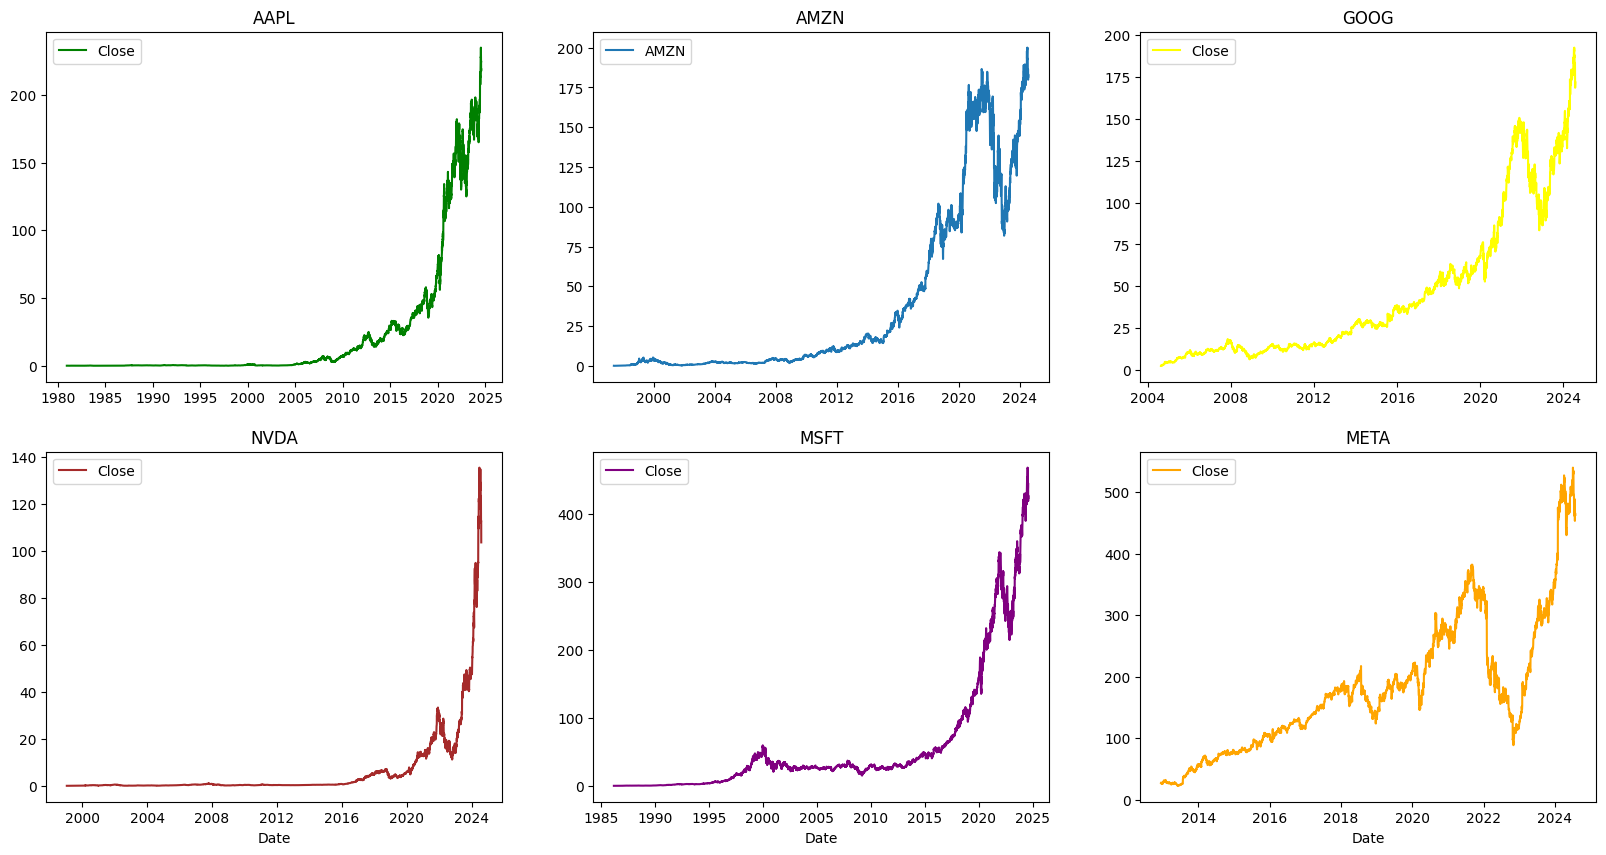

In [66]:

analysisClosingPriceWithDate(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

## TA-Lib - Technical Analysis


### Calculate technical indicator of AAPL:

In [67]:
calculateTechnicalIndicator(stock_data_aapl)
stock_data_aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,48.687742,222.376929,6.678882,4.662717
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,47.386437,221.911508,6.092722,3.748082
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,48.055700,221.535174,5.479431,3.026267
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,48.476184,221.221349,4.873263,2.448591
10997,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,225.117001,49.359115,220.990744,4.301163,2.012764


### Calculate technical indicator of AMZN:


In [68]:
calculateTechnicalIndicator(stock_data_amzn)
stock_data_amzn.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,192.8900,37.221397,189.093555,0.635114,-1.342010
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,192.2020,36.132394,188.213217,0.132395,-1.878483
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.4345,41.146719,187.669101,-0.307283,-2.065994
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.9320,42.432437,187.243472,-0.672530,-2.133520
6845,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,190.1575,40.408843,186.716476,-0.994218,-2.280971


### Calculate technical indicator of GOOG:

In [69]:
calculateTechnicalIndicator(stock_data_goog)
stock_data_goog.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,37.434718,183.080916,1.571016,-0.034166
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,32.279082,181.755115,1.035474,-1.106693
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,31.843937,180.509865,0.433845,-1.972672
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,36.545844,179.616545,-0.139569,-2.433223
5019,2024-07-30,171.830002,172.949997,170.119995,171.860001,171.860001,13681400,0.0,0.0,182.534501,37.920068,178.877827,-0.653273,-2.708091


### Calculate technical indicator of MSFT:

In [70]:
calculateTechnicalIndicator(stock_data_msft)
stock_data_msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,36.980921,446.197526,3.013510,-0.684986
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,31.696381,443.550142,1.862718,-2.740453
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,37.944660,441.809175,0.735855,-3.771598
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,39.217239,440.373064,-0.295321,-4.420024
9671,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.159119,32687600,0.0,0.0,446.118997,37.080269,438.710869,-1.272579,-5.181612


### Calculate technical indicator of NVDA:

In [71]:
calculateTechnicalIndicator(stock_data_nvda)
stock_data_nvda.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,124.9165,41.589800,123.060740,1.879233,-0.007652
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,124.2105,39.943932,122.034003,1.339824,-0.817813
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,123.6640,40.940507,121.179336,0.795656,-1.381013
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,123.0665,39.606589,120.266065,0.251767,-1.923793
6420,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,0.0,0.0,122.0380,33.349720,118.691202,-0.389413,-2.954132


### Calculate technical indicator of META:

In [72]:

calculateTechnicalIndicator(stock_data_meta)
stock_data_meta.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,36.964279,493.134155,-1.274374,-6.550694
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,34.814669,489.350903,-2.781648,-8.810746
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,40.628601,487.098437,-4.125446,-9.500635
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,40.633231,485.061442,-5.286773,-9.932081
2925,2024-07-30,467.000000,472.730011,456.700012,463.190002,463.190002,11390400,0.0,0.0,492.545000,39.789373,482.978448,-6.301008,-10.357947


### Calculate technical indicator of TSLA:

In [73]:
calculateTechnicalIndicator(stock_data_tsla)
stock_data_tsla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,44.886918,233.501099,15.873789,11.789291
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,46.951389,232.239089,14.569672,9.353206
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,46.752165,231.054414,13.116159,7.302106
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,241.949000,52.664511,231.153995,11.811547,6.593101
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,242.587000,48.220474,230.341233,10.490485,5.206237


### Show Technical Indicators with Date


In [92]:
def showTechnicalIndicator(stock_data,ticker):
    if(f'{stock_data}'.find('aapl')):
        fig=pe.line(stock_data[ticker],stock_data['Date'], y=ticker, title=f'{ticker} AAPL')
        fig.show()

In [ ]:
showTechnicalIndicator(stock_data_aapl,'SMA')

In [ ]:

showTechnicalIndicator(stock_data_aapl,'MACD')

In [ ]:
showTechnicalIndicator(stock_data_aapl,'RSI')


### Visual represent the relationship between technical indicators and closing price.


### Closing Price vs. Simple Moving Average (SMA) Indicator

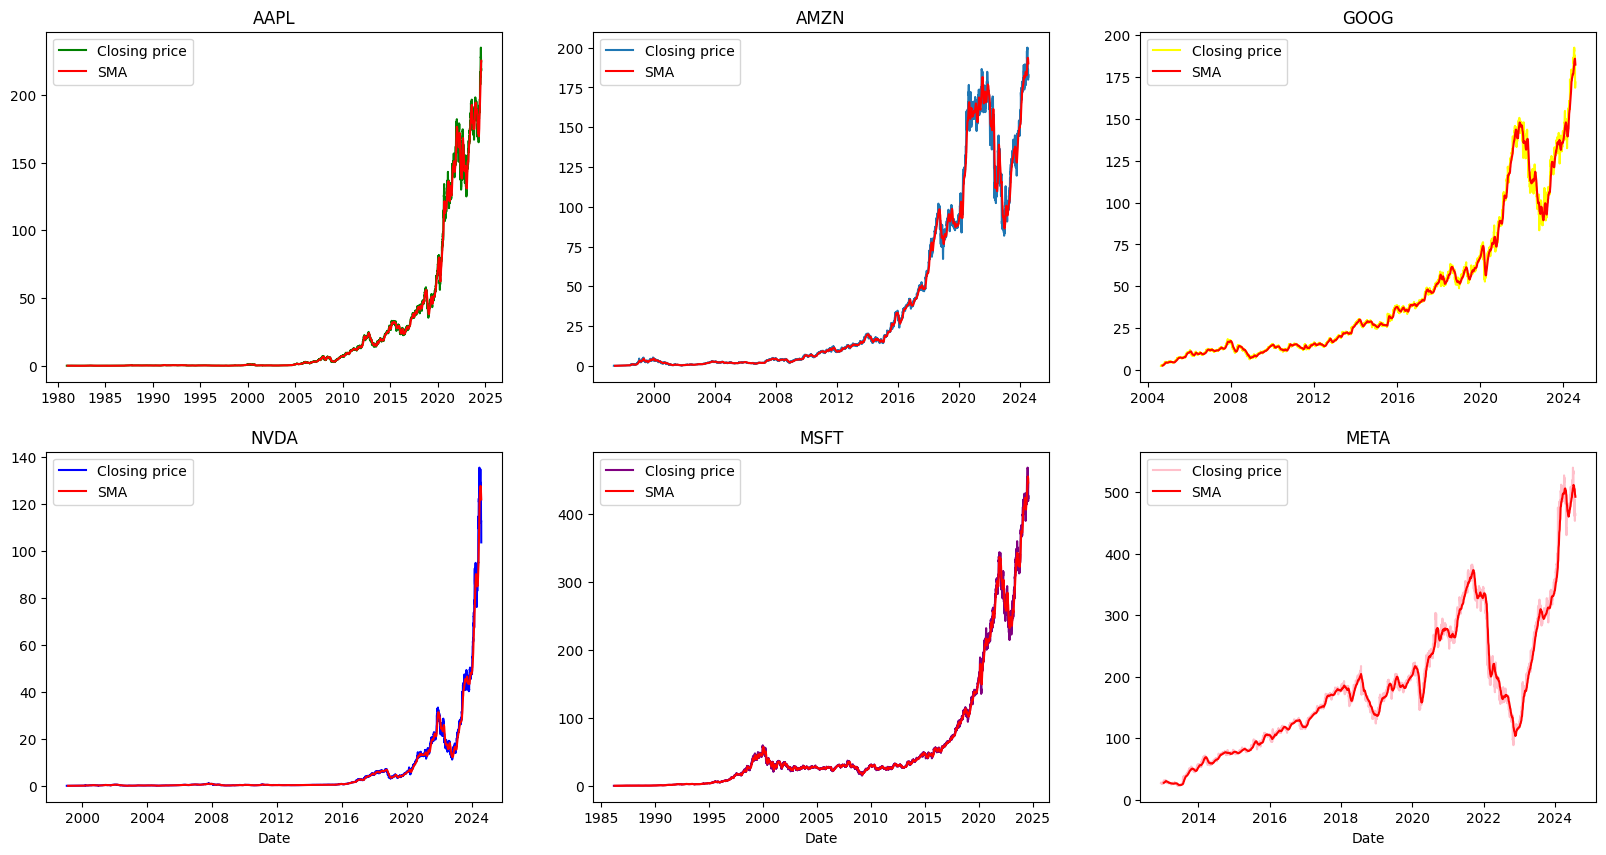

In [81]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,'SMA')
# Identifying trends, support and resistance levels.
# A rising SMA suggests an uptrend, while a falling SMA indicates a downtrend.

### Closing Price vs. Exponential Moving Average (EMA) Indicator


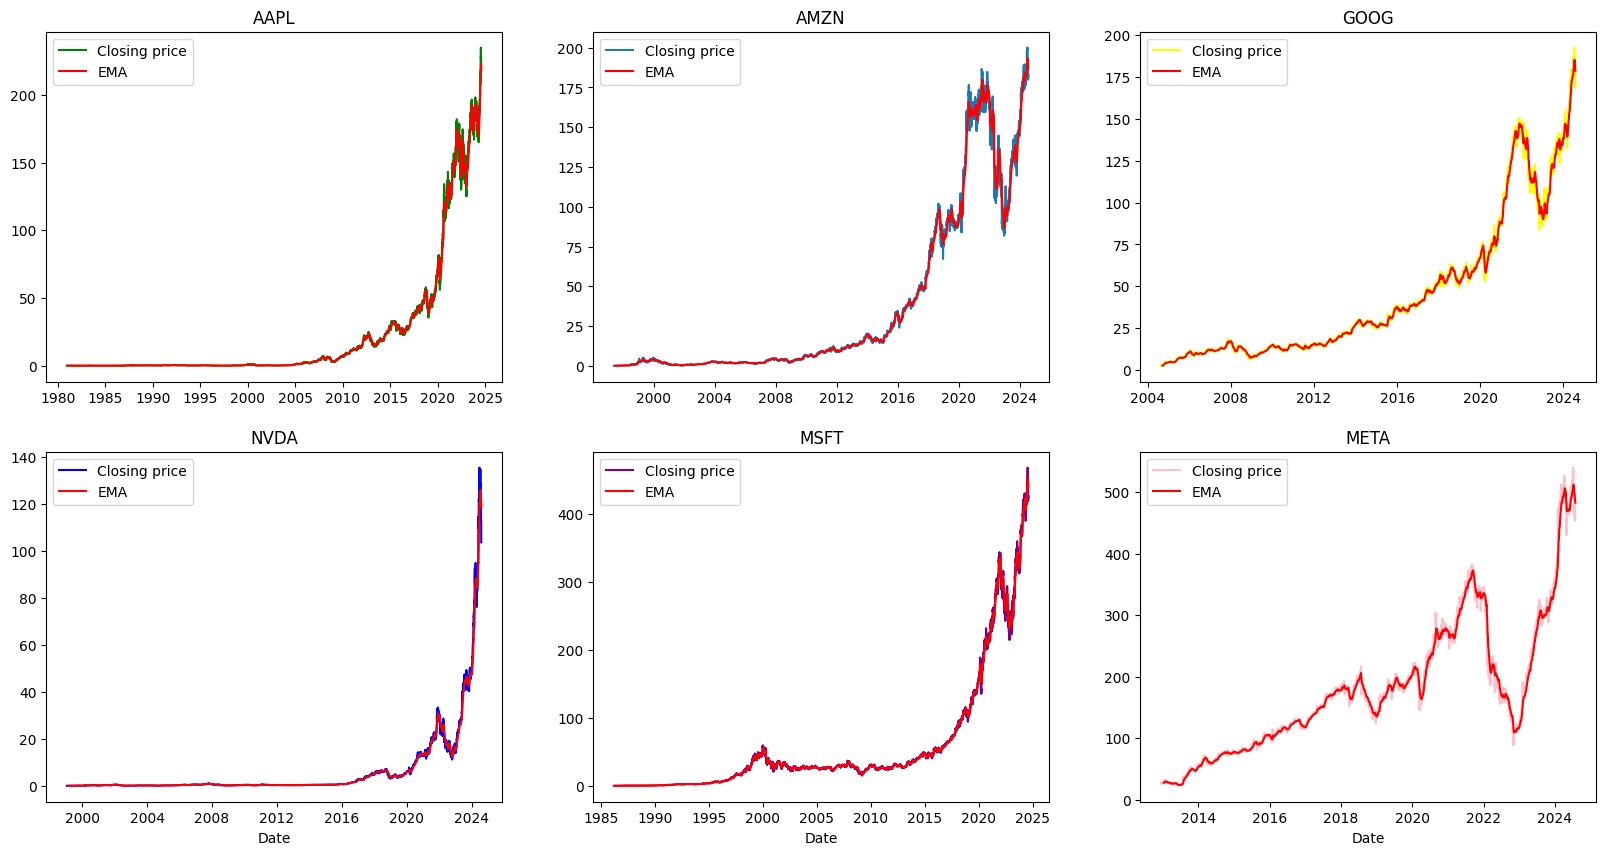

In [84]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,'EMA')
# Smoothing out price fluctuations and providing a more responsive indicator than SMA.
# EMAs are often used to identify trend changes and potential reversals.

### Closing Price vs. Relative Strength Index(RSI) Indicator


C:\Users\user\AppData\Local\Temp\ipykernel_68380\2911248511.py:58: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



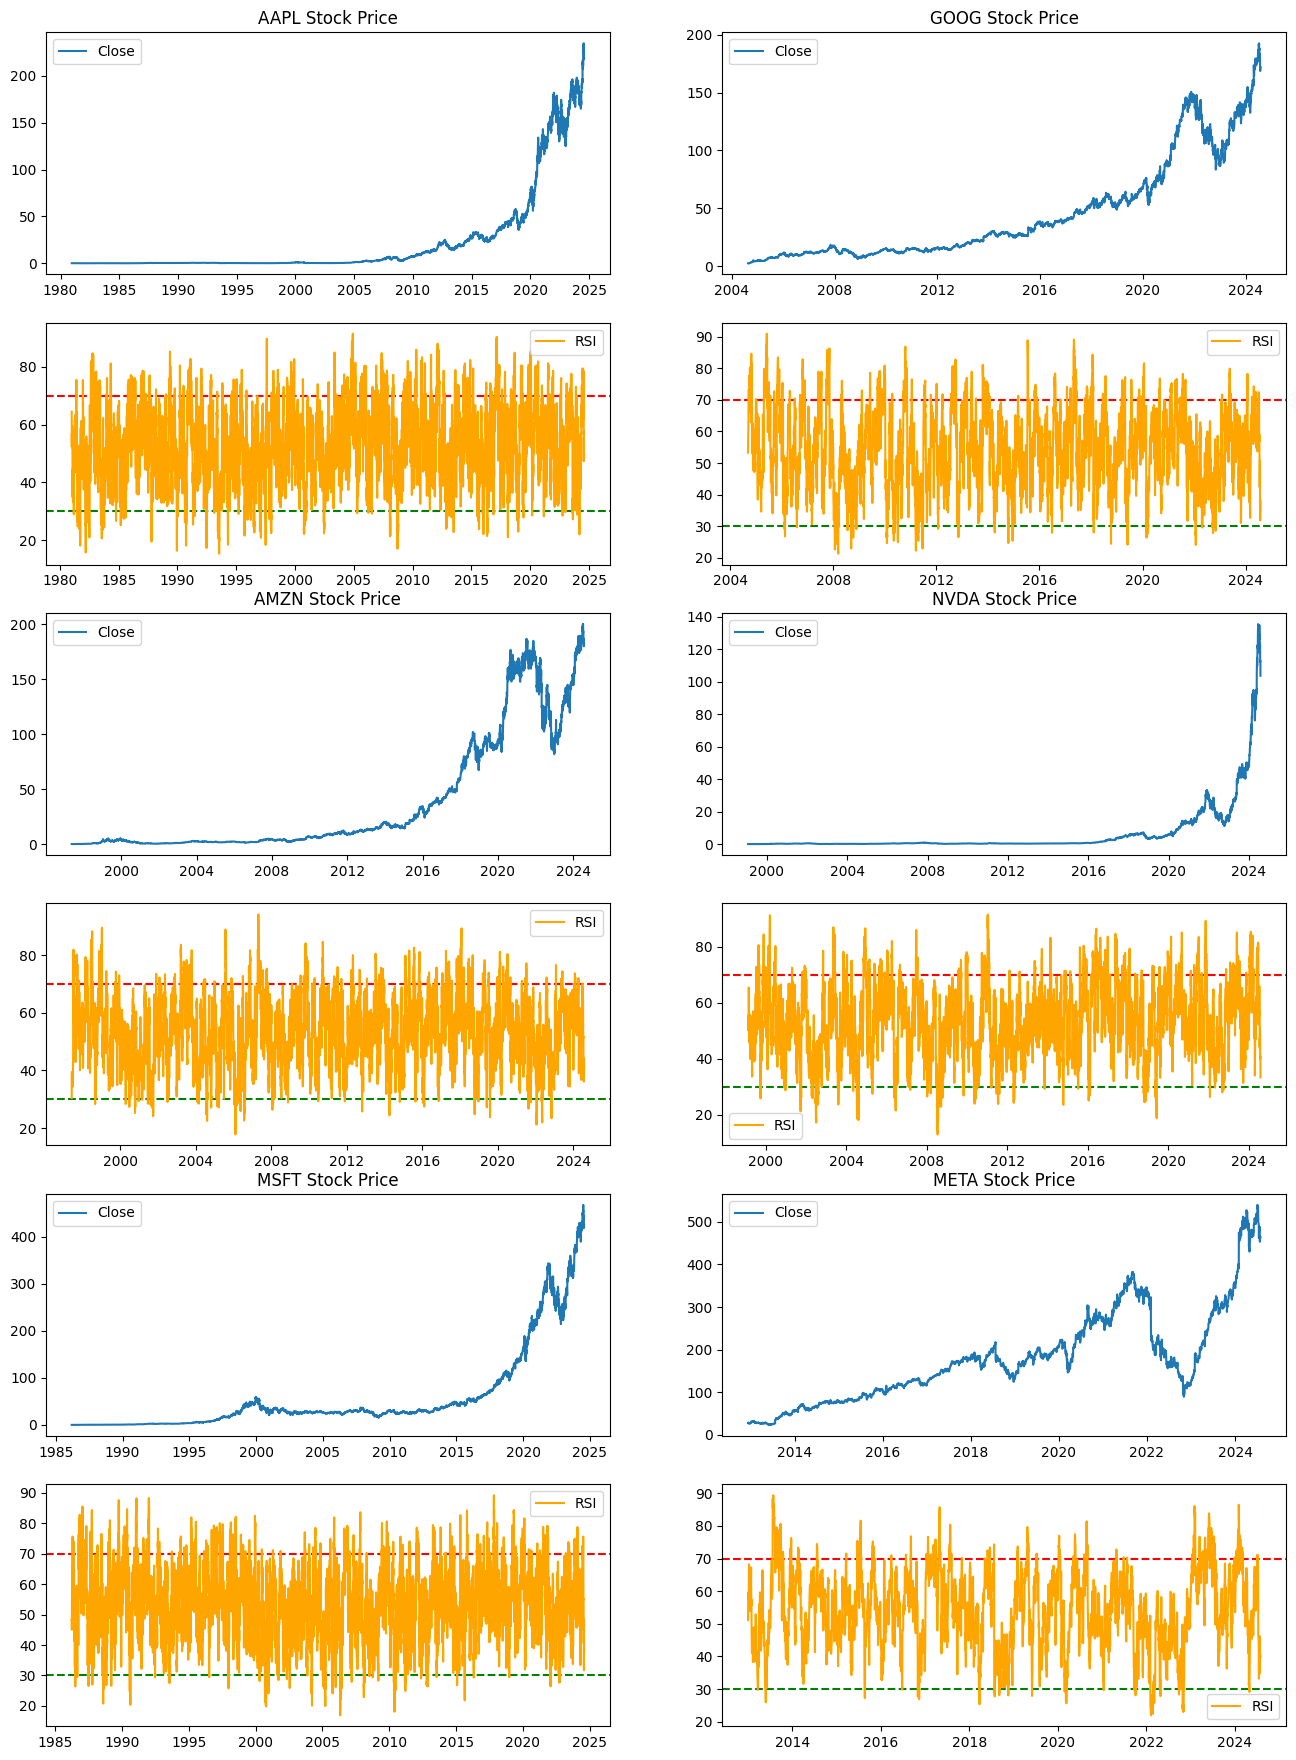

In [85]:

closingPriceRelativeStrengthIndex(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

### Closing Price vs. Moving Average Convergence Divergence (MACD) Indicator

C:\Users\user\AppData\Local\Temp\ipykernel_68380\4177939610.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



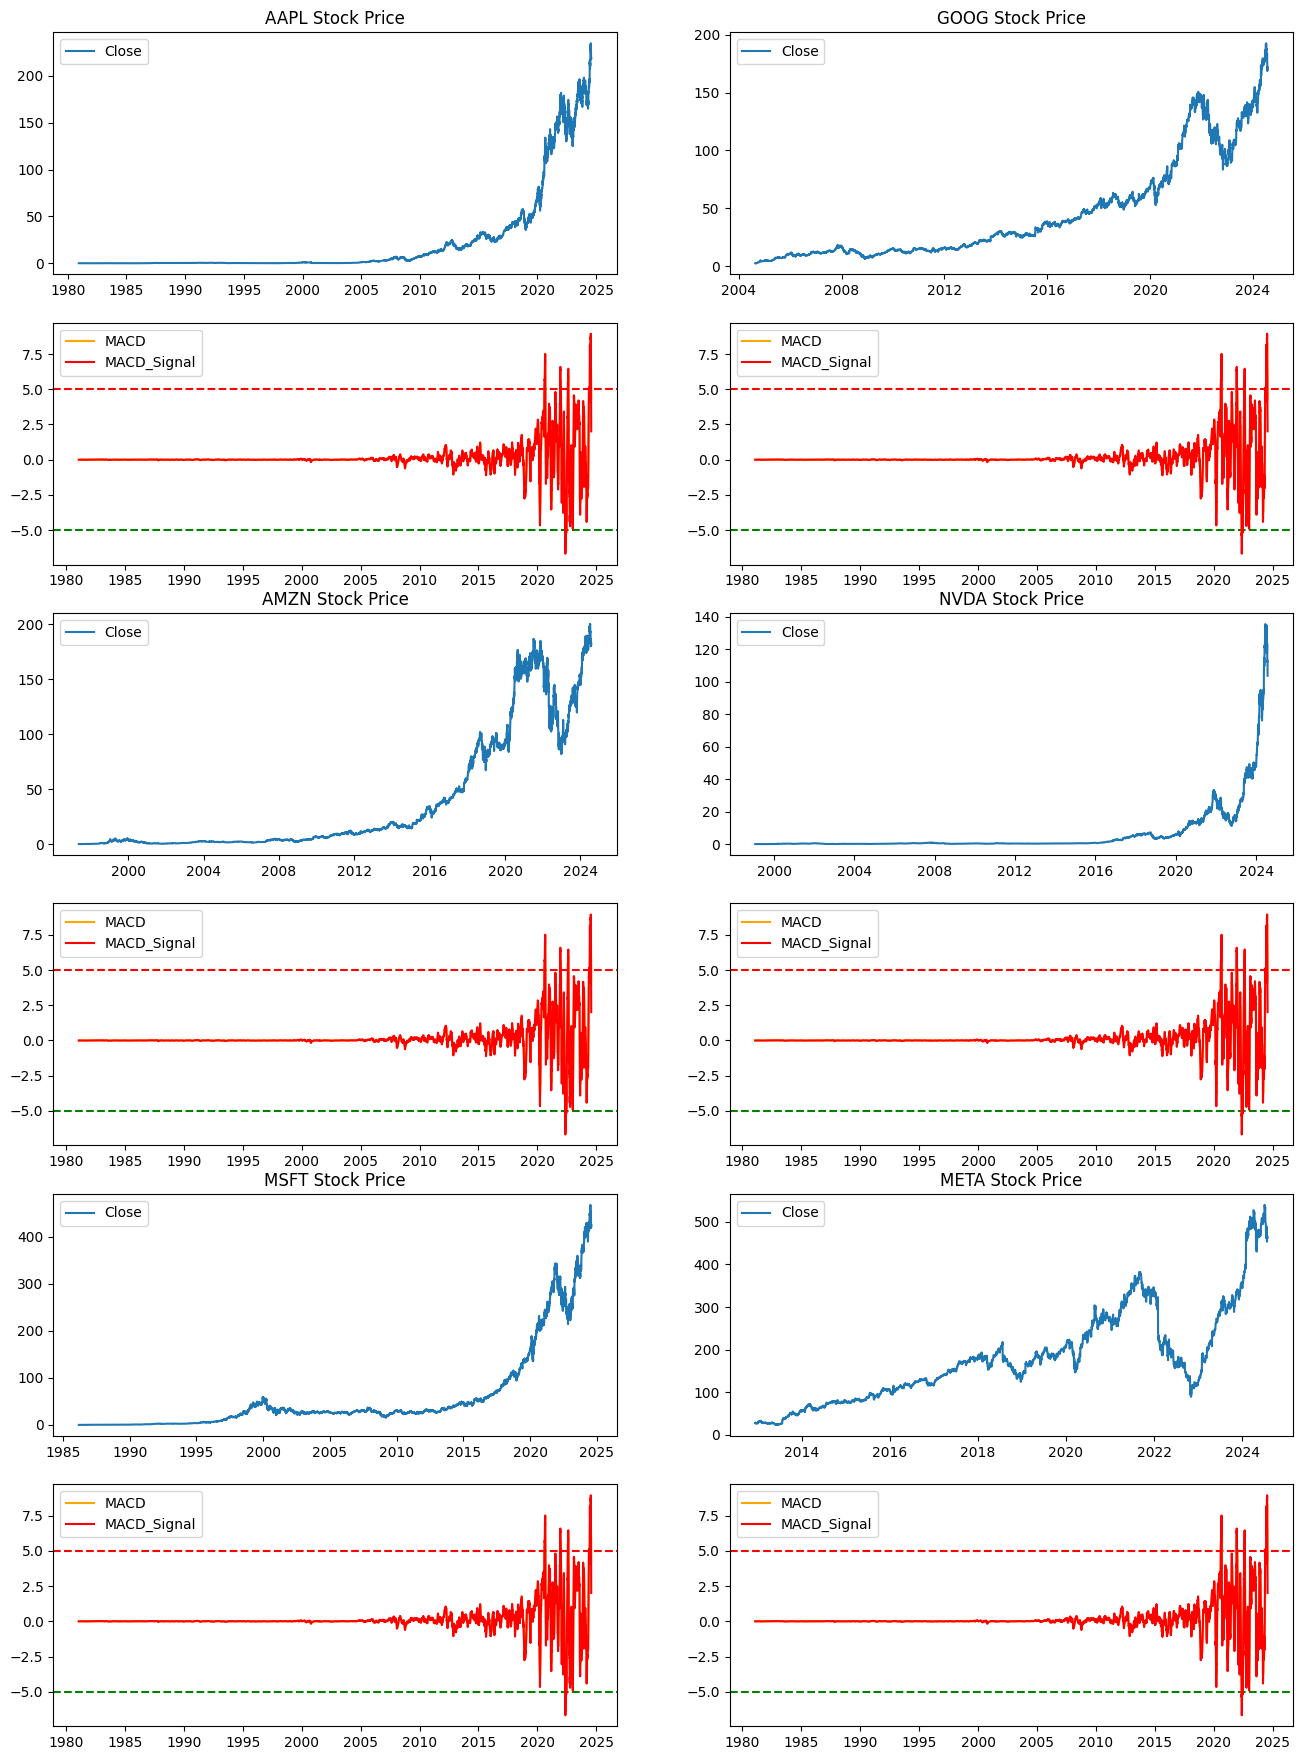

In [86]:

closingPriceMovingAverageConvergenceDivergence(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

## Financial Metrics (Portfolio analysis)

### Between AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

In [94]:

calculatePortfolioWeightAndPerformance()

f:\Week1_Challenge\Weekone\Lib\site-packages\pypfopt\expected_returns.py:32: UserWarning:

Some returns are NaN. Please check your price data.



Portfolio Weights:
{'AAPL': 0.09, 'AMZN': 0.09, 'GOOG': 0.24, 'META': 0.2, 'MSFT': 0.09, 'NVDA': 0.17, 'TSLA': 0.12}

Portfolio Performance:
Expected annual return: 28.1%
Annual volatility: 16.1%
Sharpe Ratio: 1.75


## Correlation between news sentiment and stock price

#### Rename Date of stock price


In [87]:

stock_data_aapl = stock_data_aapl.rename(columns={'Date': 'date'})
stock_data_amzn = stock_data_amzn.rename(columns={'Date': 'date'})
stock_data_goog = stock_data_goog.rename(columns={'Date': 'date'})
stock_data_msft = stock_data_msft.rename(columns={'Date': 'date'})
stock_data_nvda = stock_data_nvda.rename(columns={'Date': 'date'})
stock_data_meta = stock_data_meta.rename(columns={'Date': 'date'})
stock_data_tsla = stock_data_tsla.rename(columns={'Date': 'date'})

### Calculate average daily sentiment scores


In [ ]:
news_data = pd.read_csv(f'F:/Week1_challenge/Data/processed_analyst_ratings.csv')
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].mean()
aggregated_sentiment = pd.DataFrame(aggregated_sentiment)

### Drop sentiment_score from news


#### And replace with aggregated_sentiment



In [ ]:
news_data = news_data.drop('sentiment_score', axis=1)

## Merge aggregated_sentiment into news data


In [ ]:
news_data_and_aggregate_sentiment = pd.merge(aggregated_sentiment, news_data,how='inner', on='date')


### Check added sentiment_score


In [ ]:
news_data_and_aggregate_sentiment.head()


,date,sentiment_score,Unnamed: 0,headline,url,publisher,stock,headline_length,day_of_week,sentiment_score_word,publication_date,publication_hour,is_email,domain
0,2011-04-27 21:01:48-04:00,0.000000,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,DGP,49,Wednesday,neutral,2011-04-27,21.0,False,NaN
1,2011-04-28 13:49:29-04:00,0.136364,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,ESR,35,Thursday,positive,2011-04-28,13.0,False,NaN
2,2011-04-28 15:00:36-04:00,0.000000,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,DEJ,74,Thursday,neutral,2011-04-28,15.0,False,NaN
3,2011-04-29 13:47:06-04:00,-0.166667,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,AIA,43,Friday,negative,2011-04-29,13.0,False,NaN
4,2011-04-29 16:11:05-04:00,0.500000,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,GDL,90,Friday,positive,2011-04-29,16.0,False,NaN


### Remove the timezone of news and merge with stock price


In [ ]:
news_data_and_aggregate_sentiment['date'] = news_data_and_aggregate_sentiment['date'].dt.tz_localize(None)
stock_data_aapl['date'] = stock_data_aapl['date'].dt.tz_localize(None)

news_data_and_aggregate_sentiment['date'] = news_data_and_aggregate_sentiment['date'].dt.date
stock_data_aapl['date'] = stock_data_aapl['date'].dt.date

# Convert 'date' columns to datetime
news_data_and_aggregate_sentiment['date'] = pd.to_datetime(news_data_and_aggregate_sentiment['date'])
stock_data_aapl['date'] = pd.to_datetime(stock_data_aapl['date'])

# Merge the DataFrames
mergeStockAndNews = news_data_and_aggregate_sentiment.merge(stock_data_aapl, how='inner', on='date')


#### Check merged dataframe (news and stock price)


In [ ]:
mergeStockAndNews.head(3)

,date,sentiment_score,Unnamed: 0,headline,url,publisher,stock,headline_length,day_of_week,sentiment_score_word,...,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,2011-04-27,0.000000,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,DGP,49,Wednesday,neutral,...,12.505357,10.560461,356213200,0.0,0.0,12.158161,58.21115,12.233798,-0.039521,0.040690
1,2011-04-28,0.136364,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,ESR,35,Thursday,positive,...,12.383929,10.457921,360959200,0.0,0.0,12.154804,54.23726,12.248096,-0.022319,0.046491
2,2011-04-28,0.000000,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,DEJ,74,Thursday,neutral,...,12.383929,10.457921,360959200,0.0,0.0,12.154804,54.23726,12.248096,-0.022319,0.046491


### Calculate daily stock returns


In [ ]:
# Calculate daily stock returns
mergeStockAndNews['stock_return'] = mergeStockAndNews['Close'].pct_change()

In [ ]:
# Correlation analysis
correlation = mergeStockAndNews[['sentiment_score', 'stock_return']].corr()

### Plot the Correlation between aggregate sentiment and daily returns


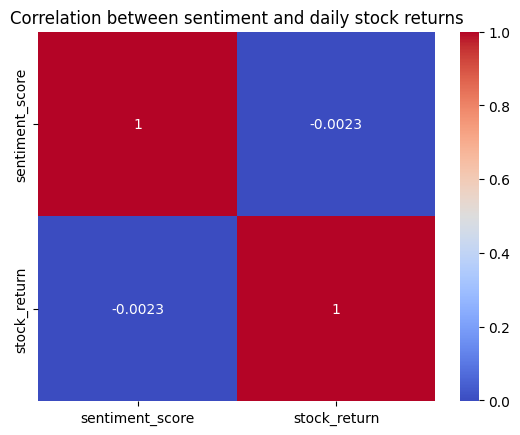

In [ ]:
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between sentiment and daily stock returns')
plt.show()

Sentiment scores and daily stock prices tend to move in the same direction, but the connection is very weak.